In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('course_730.csv', engine='python')

df_org = df

df = df.drop([list(df)[0], list(df)[-3], 'final_score', 'group'], axis=1)
#df = df.drop(['hw1_score', 'hw2_score', 'hw3_score', 'student_id'], axis=1)
df = df.drop(['student_id', 'hw1_score', 'hw3_score'], axis=1)

df = df.drop(['HW1_C', 'HW1_R', 'HW1_W', 'HW1_E'], axis=1)
df = df.drop(['HW2_C', 'HW2_R', 'HW2_W', 'HW2_E'], axis=1)
df = df.drop(['HW3_C', 'HW3_R', 'HW3_W', 'HW3_E'], axis=1)

df = df.rename(index=str, columns={list(df)[-1]: "label_2",
                              list(df)[-2]: "label_1"})
df = df[df.HW1.notna()]
df = df[df.HW2.notna()]
df = df[df.HW3.notna()]
df = df[df.HW3.notna()]
df = df[df.HW2 != 'error']
df = df[df.label_2 != '?�修']
df = df[df.label_1.notna()]


In [40]:
feature_list = list(df)
hw2_df = df[feature_list[3:4] + feature_list[14:24]]
hw2_df.head()

,hw2_score,w2_onlineDays,w2_onlineCount,w2_onlineTime,w2_passCount,w2_failCount,w2_SyntaxError,w2_NameError,w2_IndentationError,w2_ValueError,w2_TypeError
0,25.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,25.0,1.0,1.0,5245.676,58.0,5.0,1.0,4.0,0.0,0.0,0.0
8,25.0,1.0,1.0,3842.564,33.0,0.0,0.0,0.0,0.0,0.0,0.0
9,25.0,2.0,1.0,5119.693,40.0,10.0,1.0,9.0,0.0,0.0,0.0


# Cross Correlation

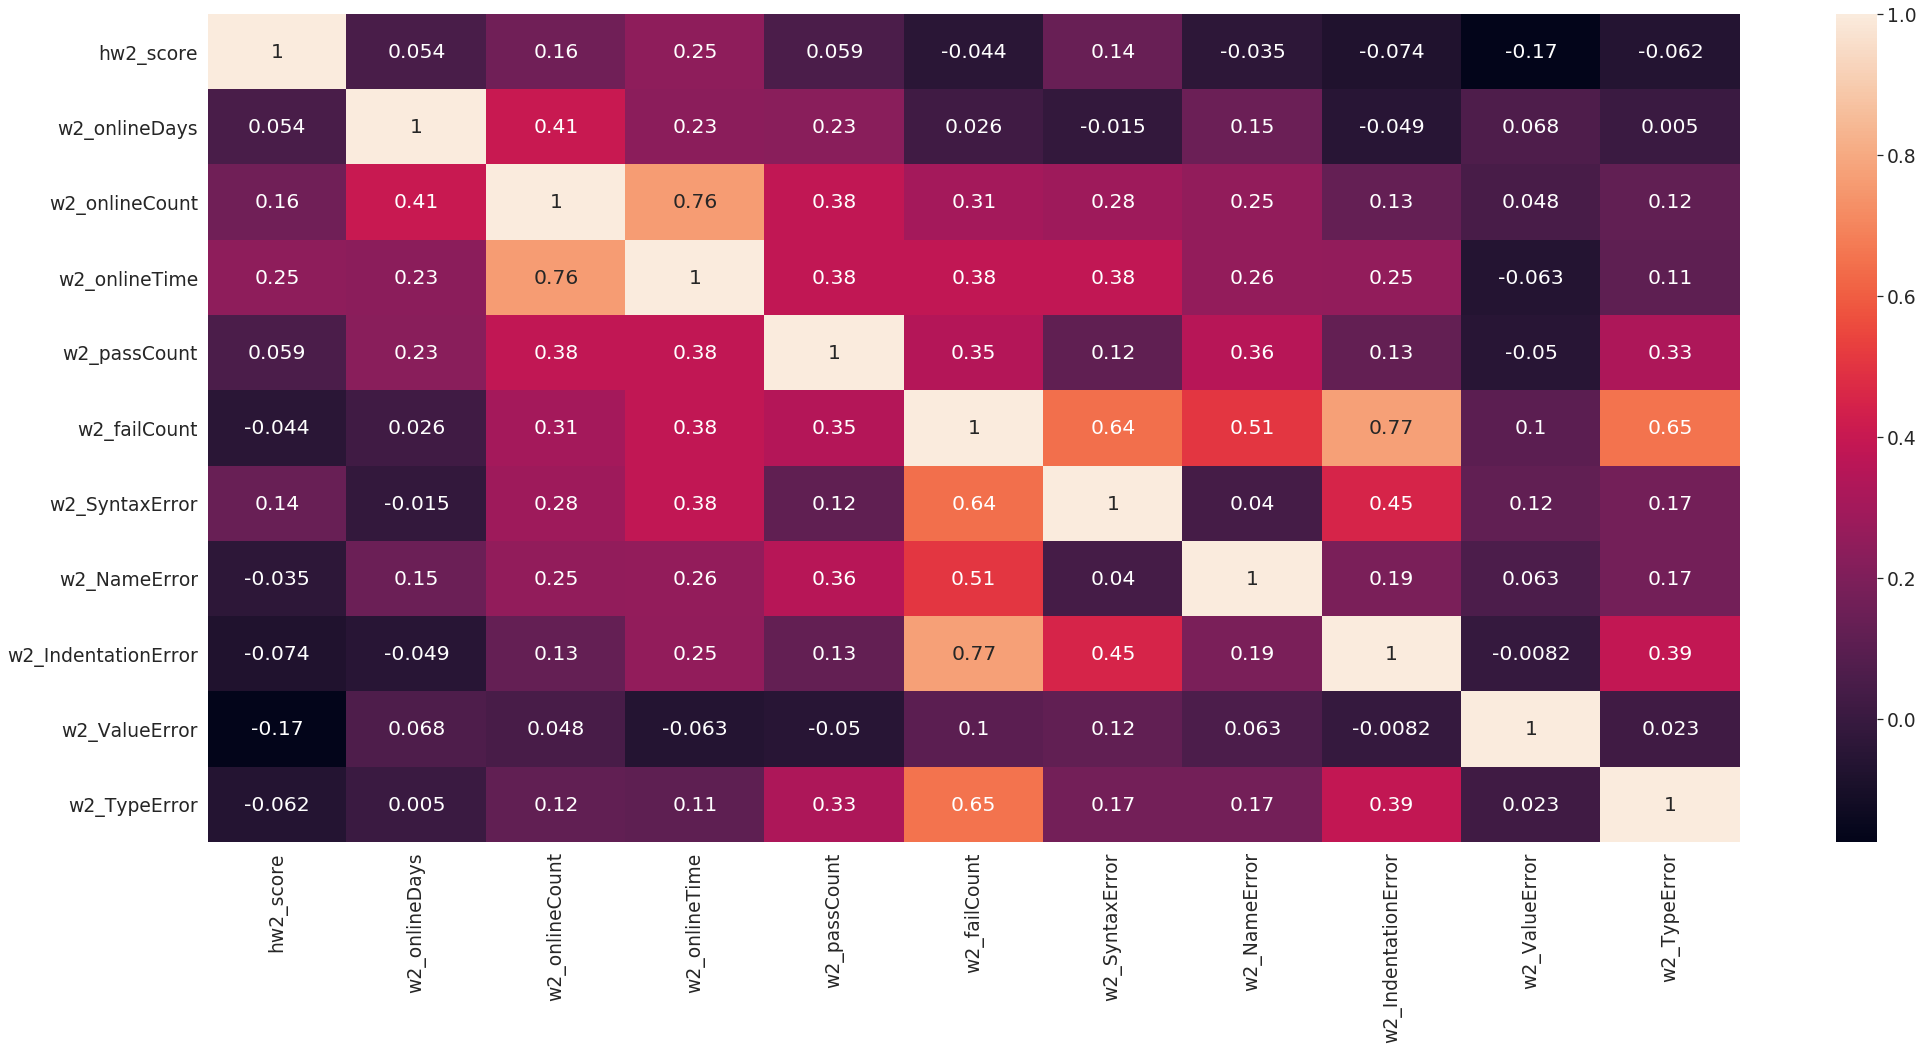

In [41]:
import seaborn as sns

Var_Corr = hw2_df.corr()
# plot the heatmap and annotation on it
sns.set(rc={'figure.figsize':(30, 15)})
sns.set(font_scale=1.7)
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

plt.tight_layout()
#plt.savefig('svm_conf.png', dpi=400)

# Distribution

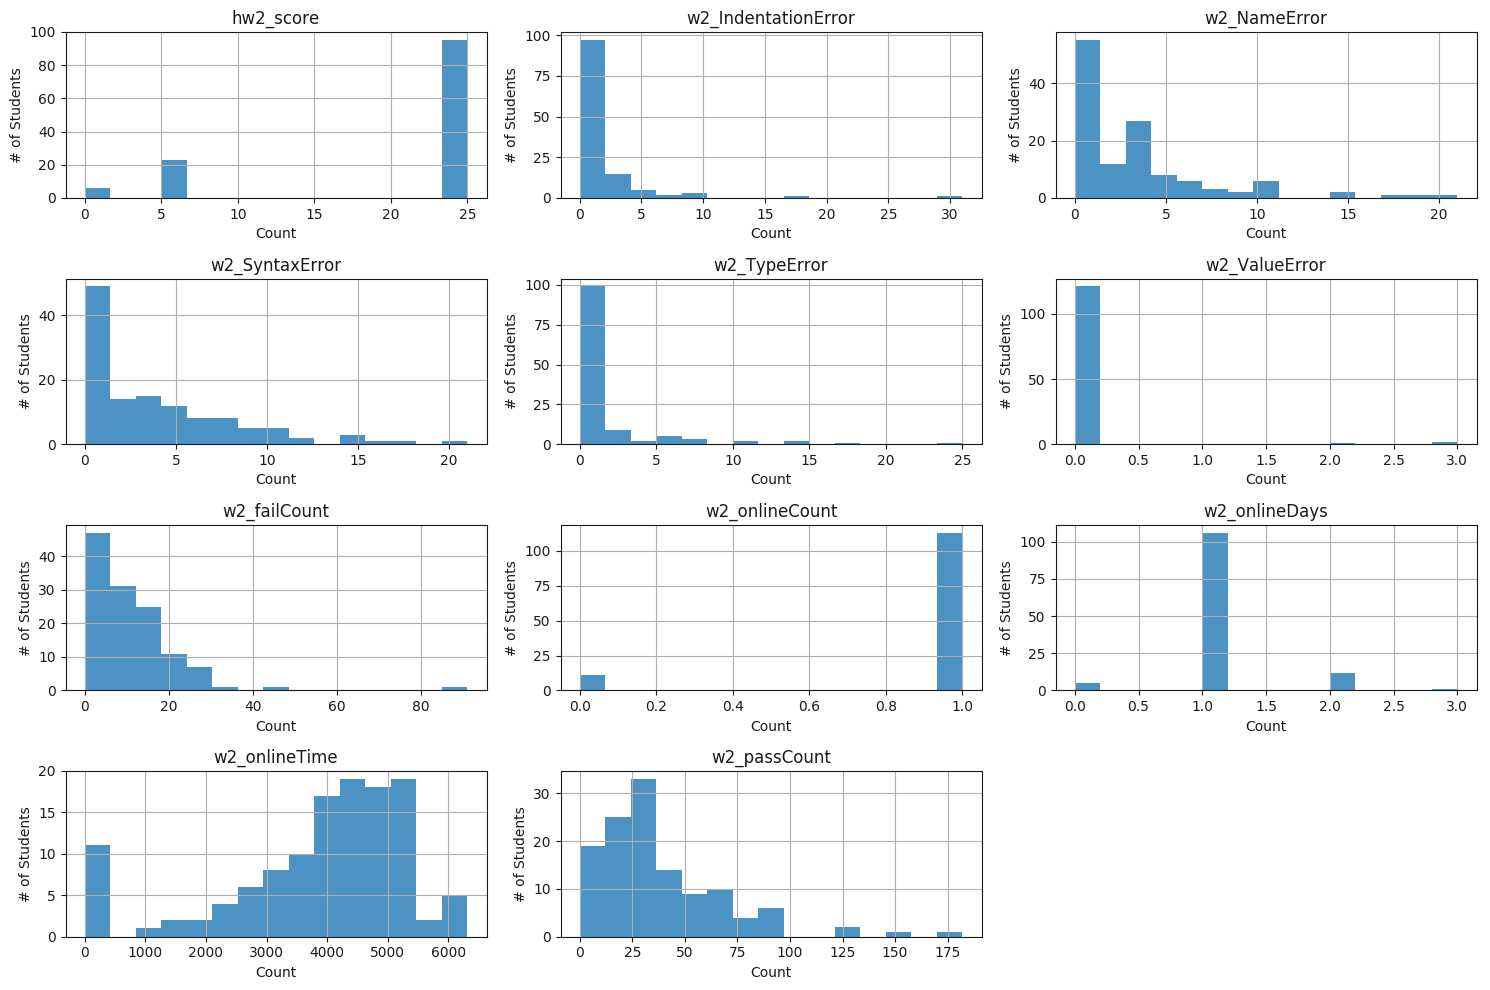

In [42]:
#plt.figure(figsize=(15, 15))
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
#matplotlib.rc('axes', titlesize=10) 

ax = hw2_df.hist(alpha=0.8, bins=15, figsize=(15, 10))
#for x in ax:
#     x.set_title('x')

for array in ax:
    for subplot in array:
        subplot.set_ylabel('# of Students', fontsize=10)
        subplot.set_xlabel('Count', fontsize=10)

plt.tight_layout()
#plt.savefig('svm_conf.png', dpi=400)

# Create Class

In [45]:
hw2_df_km = hw2_df

hw2_df_km['class'] = hw2_df_km['hw2_score'] < 24
hw2_df_km['duration'] = hw2_df_km['w2_onlineTime'] / 60
hw2_df_km['duration'] = hw2_df_km['duration'].astype(int)

hw2_df_km = hw2_df_km.drop(['hw2_score', 'w2_onlineTime'], axis=1)
hw2_df_km

,w2_onlineDays,w2_onlineCount,w2_passCount,w2_failCount,w2_SyntaxError,w2_NameError,w2_IndentationError,w2_ValueError,w2_TypeError,class,duration
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0
5,1.0,1.0,58.0,5.0,1.0,4.0,0.0,0.0,0.0,False,87
8,1.0,1.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,False,64
9,2.0,1.0,40.0,10.0,1.0,9.0,0.0,0.0,0.0,False,85
12,1.0,1.0,72.0,13.0,6.0,5.0,2.0,0.0,0.0,False,65
14,1.0,1.0,32.0,19.0,2.0,10.0,7.0,0.0,0.0,False,54
15,1.0,1.0,25.0,2.0,2.0,0.0,0.0,0.0,0.0,False,55
16,1.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,False,46
17,1.0,1.0,34.0,3.0,0.0,3.0,0.0,0.0,0.0,False,49


# KaplanMeierFitter

In [46]:
kmf = KaplanMeierFitter() 
kmf.fit(durations = hw2_df_km.duration, event_observed = hw2_df_km['class'])
#kmf.event_table

<lifelines.KaplanMeierFitter: fitted with 124 observations, 95 censored>

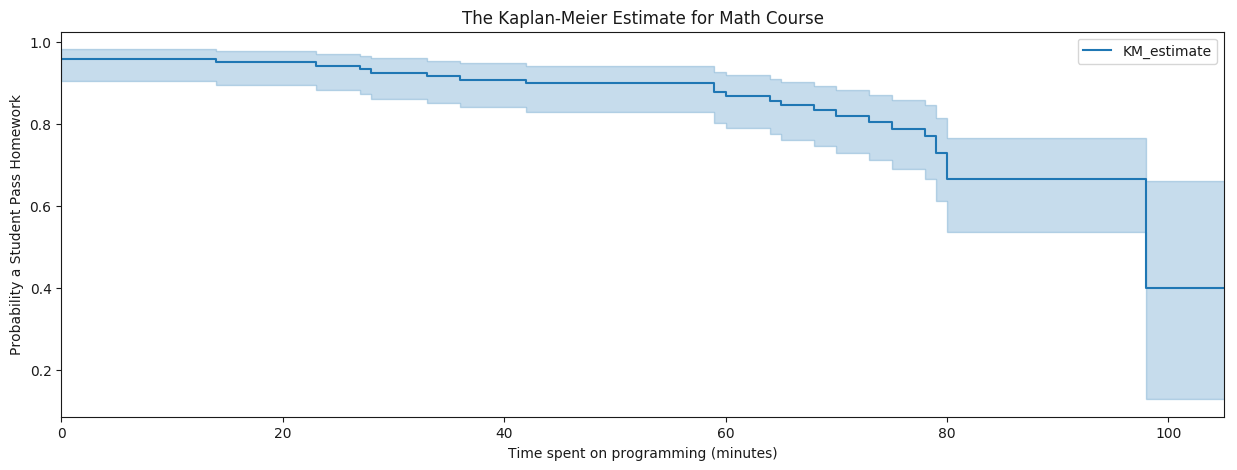

In [47]:

#plt.clf()
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rc('figure', figsize=(15, 5)) 

# plot the KM estimate
kmf.plot()
# Add title and y-axis label
plt.title("The Kaplan-Meier Estimate for Math Course")
plt.ylabel("Probability a Student Pass Homework")
plt.xlabel("Time spent on programming (minutes)")

plt.show()

In [48]:

#variable = 'w2_ValueError'
#threadhold = 1

#variable = 'w2_TypeError'
#threadhold = 3


#variable = 'w2_SyntaxError'
#threadhold = 10

#best fit
#variable = 'w2_onlineDays'
#threadhold = 3

#best fit
variable = 'w2_passCount'
threadhold = 25

hw2_df_km['class_passCount'] = hw2_df_km[variable] < threadhold
#hw2_df_km['class_passCount'] = hw2_df_km.w2_TypeError < 3
hw2_df_km = hw2_df_km.drop([variable], axis=1)
hw2_df_km

,w2_onlineDays,w2_onlineCount,w2_failCount,w2_SyntaxError,w2_NameError,w2_IndentationError,w2_ValueError,w2_TypeError,class,duration,class_passCount
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0,True
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0,True
5,1.0,1.0,5.0,1.0,4.0,0.0,0.0,0.0,False,87,False
8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,64,False
9,2.0,1.0,10.0,1.0,9.0,0.0,0.0,0.0,False,85,False
12,1.0,1.0,13.0,6.0,5.0,2.0,0.0,0.0,False,65,False
14,1.0,1.0,19.0,2.0,10.0,7.0,0.0,0.0,False,54,False
15,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,False,55,False
16,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,46,True
17,1.0,1.0,3.0,0.0,3.0,0.0,0.0,0.0,False,49,False


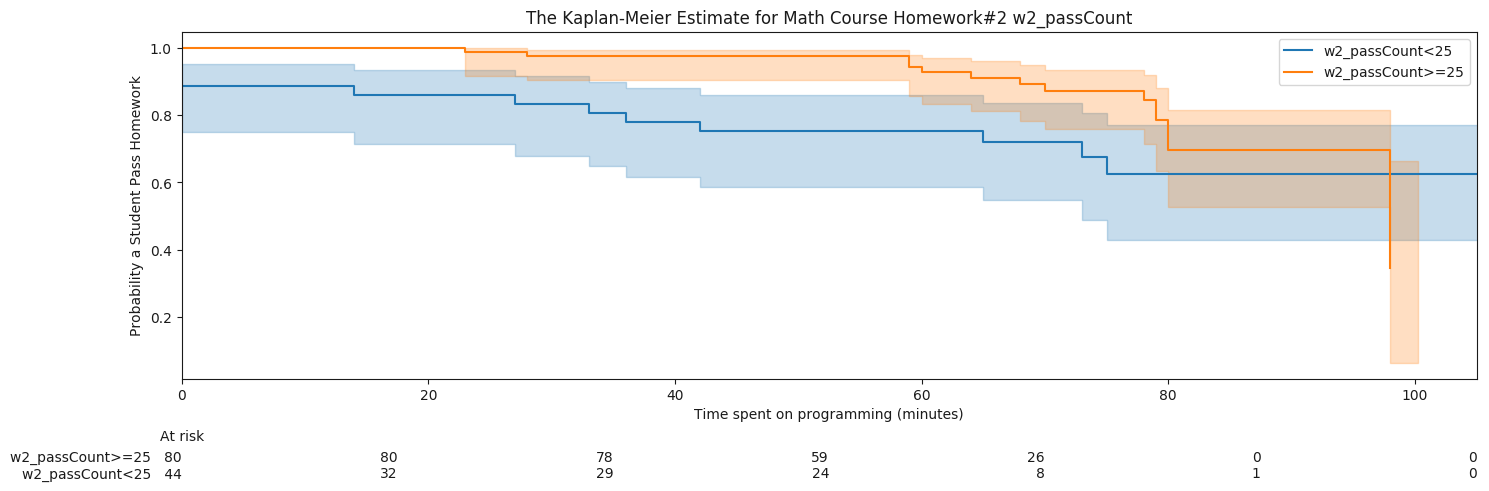

In [50]:
from lifelines import KaplanMeierFitter

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rc('figure', figsize=(15, 5)) 
ax = plt.subplot(111)

ix = hw2_df_km['class_passCount'] == True

kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(hw2_df_km.loc[ix]['duration'], 
                     hw2_df_km.loc[ix]['class'], 
                     label = variable + '<' + str(threadhold)).plot(ax=ax)

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(hw2_df_km.loc[~ix]['duration'], 
                 hw2_df_km.loc[~ix]['class'],
                 label = variable + '>=' + str(threadhold)).plot(ax=ax)

plt.title("The Kaplan-Meier Estimate for Math Course Homework#2 " +  variable)
plt.ylabel("Probability a Student Pass Homework")
plt.xlabel("Time spent on programming (minutes)")

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_exp, kmf_control, ax=ax)

plt.tight_layout()
plt.savefig('km_hw2_passcount.png', dpi=400)

# LogRank

In [51]:
from lifelines.statistics import multivariate_logrank_test


results = multivariate_logrank_test(hw2_df_km['duration'], 
                                    hw2_df_km['class_passCount'], 
                                    hw2_df_km['class'])
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic    p  -log2(p)
           4.11 0.04      4.56


# Cox Proportional Hazard Model

In [52]:
from lifelines import CoxPHFitter

hw2_df_cph = hw2_df_km.drop(['w2_onlineCount'], axis=1)
#hw2_df_cph = hw2_df_km

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(hw2_df_cph, duration_col='duration', event_col='class')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 124 observations, 95 censored>
      duration col = 'duration'
         event col = 'class'
number of subjects = 124
  number of events = 29
    log-likelihood = -107.07
  time fit was run = 2019-02-15 15:57:58 UTC

---
                     coef  exp(coef)  se(coef)     z      p  -log2(p)  lower 0.95  upper 0.95
w2_onlineDays       -0.64       0.53      0.65 -0.98   0.32      1.62       -1.90        0.63
w2_failCount         0.19       1.21      0.08  2.40   0.02      5.94        0.03        0.34
w2_SyntaxError      -0.43       0.65      0.12 -3.50 <0.005     11.06       -0.67       -0.19
w2_NameError        -0.19       0.83      0.09 -2.03   0.04      4.57       -0.37       -0.01
w2_IndentationError -0.15       0.86      0.10 -1.47   0.14      2.81       -0.35        0.05
w2_ValueError        0.62       1.85      0.27  2.29   0.02      5.52        0.09        1.14
w2_TypeError        -0.14       0.87      0.11 -1.29   0.20      2.34       -0.36     

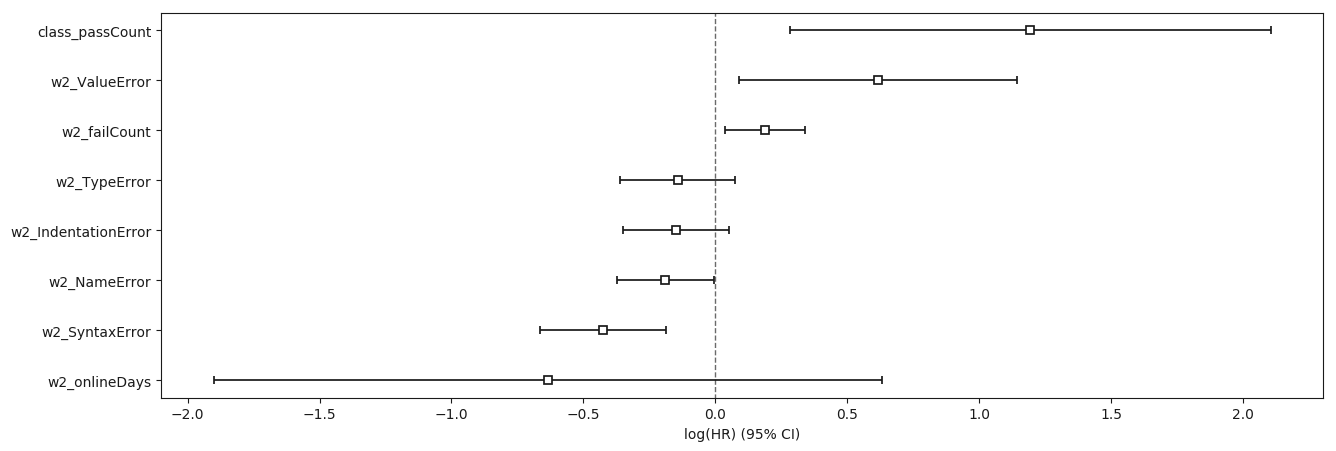

In [53]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rc('figure', figsize=(15, 5)) 
cph.plot()